# Testing Functions for Calculating Activity Onset on Mult Spiders

### In this notebook:
- I will be testing necessary functions for calculating activity onset

In [29]:
#Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as matdates
from datetime import timedelta
import datetime as dt

filename = 'Metazygia wittfeldae Monitor 1 Updated_LD.csv'

#Read Spider activity CSV file
df = pd.read_csv(filename)
df.set_index('Date-Time', inplace = True)

#Turn date-time column into datetime format
df.index = pd.to_datetime(df.index)

#Determine what time the lights turn off at night
lights_turn_off = df[df['Light'].diff() == -1].index[0]
lights_turn_on = df[df['Light'].diff() == 1].index[0]

df

,Light,Monitor 1 Spider 1,Monitor 1 Spider 2,Monitor 1 Spider 3,Monitor 1 Spider 4,Monitor 1 Spider 5,Monitor 1 Spider 6,Monitor 1 Spider 7,Monitor 1 Spider 8,Monitor 1 Spider 9,...,Monitor 1 Spider 21,Monitor 1 Spider 23,Monitor 1 Spider 25,Monitor 1 Spider 26,Monitor 1 Spider 27,Monitor 1 Spider 28,Monitor 1 Spider 29,Monitor 1 Spider 30,Monitor 1 Spider 31,Monitor 1 Spider 32
Date-Time,,,,,,,,,,,,,,,,,,,,,
2017-04-21 00:00:00,0,0,0,0,0,1,3,0,0,3,...,0,0,0,0,0,2,5,0,0,0
2017-04-21 00:01:00,0,0,0,0,0,0,9,0,0,16,...,0,0,0,0,0,5,10,0,0,0
2017-04-21 00:02:00,0,0,0,0,0,7,2,0,0,10,...,0,0,0,0,4,4,4,0,0,0
2017-04-21 00:03:00,0,0,0,0,0,6,0,0,0,0,...,0,0,0,0,0,5,4,0,0,0
2017-04-21 00:04:00,0,0,0,0,2,2,0,0,0,2,...,0,0,0,0,0,3,2,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-04-25 23:55:00,0,15,0,5,0,0,0,0,0,0,...,0,0,0,0,0,0,0,11,0,2
2017-04-25 23:56:00,0,6,0,6,0,0,0,0,0,0,...,0,0,0,0,0,0,0,5,10,0
2017-04-25 23:57:00,0,12,0,5,0,0,0,0,0,0,...,0,0,0,0,0,0,0,5,7,7


In [3]:
lights_turn_on.time()

datetime.time(7, 1)

## Creating a Rolling average dataframe

In [4]:
## This function makes a copy of the original dataframe 
def create_rolling_df(df):
    
    #copy the original dataframe and drop light column as to only include spider activity in new dataframe
    rolling_df = df.copy().drop('Light', axis = 1)
    
    #calculate rolling average of every column
    rolling_df = rolling_df.rolling(30).mean()
    
    return rolling_df

In [5]:
#test create rolling average dataframe function
rolling_df = create_rolling_df(df)

display(rolling_df)

,Monitor 1 Spider 1,Monitor 1 Spider 2,Monitor 1 Spider 3,Monitor 1 Spider 4,Monitor 1 Spider 5,Monitor 1 Spider 6,Monitor 1 Spider 7,Monitor 1 Spider 8,Monitor 1 Spider 9,Monitor 1 Spider 10,...,Monitor 1 Spider 21,Monitor 1 Spider 23,Monitor 1 Spider 25,Monitor 1 Spider 26,Monitor 1 Spider 27,Monitor 1 Spider 28,Monitor 1 Spider 29,Monitor 1 Spider 30,Monitor 1 Spider 31,Monitor 1 Spider 32
Date-Time,,,,,,,,,,,,,,,,,,,,,
2017-04-21 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-04-21 00:01:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-04-21 00:02:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-04-21 00:03:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-04-21 00:04:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-04-25 23:55:00,2.700000,1.866667,5.200000,0.0,0.0,4.033333,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.633333,5.566667,9.266667
2017-04-25 23:56:00,2.900000,1.866667,5.400000,0.0,0.0,3.966667,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.800000,5.900000,9.066667
2017-04-25 23:57:00,3.300000,1.866667,5.566667,0.0,0.0,3.766667,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.966667,5.900000,8.666667


## The following 2 functions are used to find when the lights turn on and off and then set the list up for use with calculating threshold

In [6]:
#This function finds all times when lights turn on and off and returns the index of these occurrences
def find_lights_turn_on_off(df):
    
    #find indices where lights turn on and off
    lights_turn_on_off = df[df['Light'].diff() != 0]
    lights_turn_on_off = lights_turn_on_off.append(df.iloc[-1])
    
    #drop the first 2 and last row because these are incomplete days
    on_off = lights_turn_on_off.iloc[2:, :]
    
    #turn the index into a list to loop through
    on_off_list = list(on_off.index.values)
    
    return on_off_list

In [7]:
#test function
on_off_list = find_lights_turn_on_off(df)

on_off_list

[numpy.datetime64('2017-04-21T19:02:00.000000000'),
 numpy.datetime64('2017-04-22T07:01:00.000000000'),
 numpy.datetime64('2017-04-22T19:02:00.000000000'),
 numpy.datetime64('2017-04-23T07:01:00.000000000'),
 numpy.datetime64('2017-04-23T19:02:00.000000000'),
 numpy.datetime64('2017-04-24T07:01:00.000000000'),
 numpy.datetime64('2017-04-24T19:02:00.000000000'),
 numpy.datetime64('2017-04-25T07:01:00.000000000'),
 numpy.datetime64('2017-04-25T19:02:00.000000000'),
 numpy.datetime64('2017-04-25T23:59:00.000000000')]

In [8]:
#This function groups the created list so that the times where the lights turn on and off each day are subelements
def create_on_off_sublist(on_off_list):
    
    #group every two elements together
    on_off_subList = [on_off_list[n:n+2] for n in range(0, len(on_off_list), 2)]
    
    return on_off_subList

In [9]:
create_on_off_sublist(on_off_list)

[[numpy.datetime64('2017-04-21T19:02:00.000000000'),
  numpy.datetime64('2017-04-22T07:01:00.000000000')],
 [numpy.datetime64('2017-04-22T19:02:00.000000000'),
  numpy.datetime64('2017-04-23T07:01:00.000000000')],
 [numpy.datetime64('2017-04-23T19:02:00.000000000'),
  numpy.datetime64('2017-04-24T07:01:00.000000000')],
 [numpy.datetime64('2017-04-24T19:02:00.000000000'),
  numpy.datetime64('2017-04-25T07:01:00.000000000')],
 [numpy.datetime64('2017-04-25T19:02:00.000000000'),
  numpy.datetime64('2017-04-25T23:59:00.000000000')]]

## The following two function are used to calculate activity onset values
##### the first calculates activity onset on the column, the second is used to loop through all spider columns

In [10]:
#This function calculates the threshold for every day and appends the value to a list
def calculate_activity_onset(df, on_off_sublist, column_name):
    activity_onset_values = []
    for x in on_off_sublist:
        
        #loop through the times it is dark every night
        looped_df = df.loc[x[0]:x[1], :]
        
        #calculate threshold every night
        threshold = looped_df[column_name].mean()
        
        #find all points where rolling average of activity is above the threshold 
        threshold_crossings = looped_df[looped_df[column_name] > threshold].index
        
        #append first threshold crossing to the activity onset list every day
        if len(threshold_crossings) > 0:
            activity_onset_values.append(threshold_crossings[0])
        else:
            activity_onset_values.append('NaN')
        
    
    return activity_onset_values

In [11]:
#this function loops through all column names and calculates activity onset for every day for every spider
def calculate_activity_onset_multiple_spiders(df, rolling_df):
    #create list of spider names
    spider_names = list(rolling_df)
    
    #create empty dictionary to store activity onset values in
    mult_spiders_activity_onset_dict = {}
    
    #create list of all dates and times where lights turn on and off
    transition_indexes_list = find_lights_turn_on_off(df)
    
    #create sublists containing each day of light switch indeces so they are easy to work with
    on_off_sublist = create_on_off_sublist(transition_indexes_list)
    
    #loop through all columns
    for i in spider_names:
        mult_spiders_activity_onset_values = calculate_activity_onset(rolling_df, on_off_sublist, i)
    
        #create dictionary key and element containing spider name and activity onset
        mult_spiders_activity_onset_dict[i] = mult_spiders_activity_onset_values
        
    return mult_spiders_activity_onset_dict
    

In [12]:
#test the multiple spider activity onset function
mult_spiders_activity_onset_dict = calculate_activity_onset_multiple_spiders(df, rolling_df)

mult_spiders_activity_onset_dict

{'Monitor 1 Spider 1': [Timestamp('2017-04-21 19:32:00'),
  Timestamp('2017-04-22 19:45:00'),
  Timestamp('2017-04-23 19:30:00'),
  Timestamp('2017-04-24 19:26:00'),
  Timestamp('2017-04-25 19:39:00')],
 'Monitor 1 Spider 2': [Timestamp('2017-04-21 20:10:00'),
  Timestamp('2017-04-22 19:39:00'),
  Timestamp('2017-04-23 19:37:00'),
  Timestamp('2017-04-24 19:29:00'),
  Timestamp('2017-04-25 19:38:00')],
 'Monitor 1 Spider 3': [Timestamp('2017-04-21 19:40:00'),
  Timestamp('2017-04-22 19:43:00'),
  Timestamp('2017-04-23 19:28:00'),
  Timestamp('2017-04-24 19:31:00'),
  Timestamp('2017-04-25 19:36:00')],
 'Monitor 1 Spider 4': [Timestamp('2017-04-21 20:03:00'),
  Timestamp('2017-04-22 20:01:00'),
  Timestamp('2017-04-23 20:05:00'),
  Timestamp('2017-04-24 19:37:00'),
  Timestamp('2017-04-25 19:44:00')],
 'Monitor 1 Spider 5': [Timestamp('2017-04-21 19:38:00'),
  Timestamp('2017-04-22 19:41:00'),
  Timestamp('2017-04-23 19:33:00'),
  Timestamp('2017-04-24 19:36:00'),
  Timestamp('2017-04-2

### The following function is the final function for calculating activity onset; It takes the dictionary of activity onsets and creates a dataframe for it

In [13]:
#Create activity onset dataframe function
def create_activity_onset_df(mult_spiders_activity_onset_dict, lights_turn_off):

    #create dataframe from dictionary previously created
    mult_spiders_activity_onset_df = pd.DataFrame.from_dict(mult_spiders_activity_onset_dict)

    #subtract the time the lights turn off from every value in df
    subtracted_df = mult_spiders_activity_onset_df - lights_turn_off
    
    #create list of spiders
    spider_names = list(subtracted_df)
    
    #loop through every column to extract activity onset time
    for x in spider_names: 
        
        #extract minutes and hours from every value in each column to get activity onset in relation to lights turn off
        subtracted_df[x] = subtracted_df[x].dt.seconds/60
    
    #list of unique dates to make the index of the subtracted df
    list_of_dates = list(mult_spiders_activity_onset_df.iloc[:, 1].dt.date)
    
    #set the unique dates as the index
    subtracted_df.index = list_of_dates
    
    #save dataframe as csv file
    subtracted_df.to_csv('Activity_onset_monitor_1_all_spiders.csv')
    
    return subtracted_df

In [14]:
#Test this function using a 3 step process including the 2 functions previously used
activity_onset_df = create_activity_onset_df(mult_spiders_activity_onset_dict, lights_turn_off)

display(activity_onset_df)

,Monitor 1 Spider 1,Monitor 1 Spider 2,Monitor 1 Spider 3,Monitor 1 Spider 4,Monitor 1 Spider 5,Monitor 1 Spider 6,Monitor 1 Spider 7,Monitor 1 Spider 8,Monitor 1 Spider 9,Monitor 1 Spider 10,...,Monitor 1 Spider 21,Monitor 1 Spider 23,Monitor 1 Spider 25,Monitor 1 Spider 26,Monitor 1 Spider 27,Monitor 1 Spider 28,Monitor 1 Spider 29,Monitor 1 Spider 30,Monitor 1 Spider 31,Monitor 1 Spider 32
2017-04-21,30.0,68.0,38.0,61.0,36.0,33.0,54.0,33.0,43.0,63.0,...,46.0,128.0,51.0,36.0,32.0,73.0,35.0,182.0,25.0,33.0
2017-04-22,43.0,37.0,41.0,59.0,39.0,25.0,27.0,42.0,34.0,340.0,...,26.0,91.0,33.0,37.0,34.0,54.0,31.0,54.0,34.0,37.0
2017-04-23,28.0,35.0,26.0,63.0,31.0,38.0,36.0,45.0,38.0,36.0,...,21.0,88.0,47.0,23.0,28.0,49.0,26.0,45.0,24.0,33.0
2017-04-24,24.0,27.0,29.0,35.0,34.0,28.0,34.0,21.0,28.0,47.0,...,32.0,70.0,47.0,36.0,28.0,51.0,30.0,29.0,24.0,27.0
2017-04-25,37.0,36.0,34.0,42.0,36.0,26.0,33.0,25.0,34.0,54.0,...,32.0,77.0,67.0,27.0,24.0,52.0,18.0,44.0,37.0,43.0


# Creating Raster Plots

In [ ]:
##WORK IN PROGRESS, not even close to done

In [15]:
#this function creates a list of dataframes for each date
def create_list_of_df(df):
    #find all unique days
    all_days = np.unique(list(df.index.date))
    
    #create empty list to append to 
    bracket = []
    
    #loop through dataframe and create new df for every day
    for x in range(len(all_days)):
        bracket.append(df[df.index.date==all_days[x]])
        
    return bracket

In [16]:
list_of_df = create_list_of_df(rolling_df)

print(list_of_df)

[                     Monitor 1 Spider 1  Monitor 1 Spider 2  \
Date-Time                                                     
2017-04-21 00:00:00                 NaN                 NaN   
2017-04-21 00:01:00                 NaN                 NaN   
2017-04-21 00:02:00                 NaN                 NaN   
2017-04-21 00:03:00                 NaN                 NaN   
2017-04-21 00:04:00                 NaN                 NaN   
...                                 ...                 ...   
2017-04-21 23:55:00            5.433333            3.666667   
2017-04-21 23:56:00            5.333333            3.200000   
2017-04-21 23:57:00            5.233333            3.000000   
2017-04-21 23:58:00            4.033333            3.000000   
2017-04-21 23:59:00            3.900000            2.533333   

                     Monitor 1 Spider 3  Monitor 1 Spider 4  \
Date-Time                                                     
2017-04-21 00:00:00                 NaN              

In [17]:
column_name = str(list(rolling_df)[0])
print(column_name)
def raster_plot(rolling_df, activity_onset_df, column_name):
    
    place = 1
    all_days = np.unique(list(rolling_df.index.date))
    
    #set up figures and figsize
    plt.figure(figsize= (10, 13))
    plt.subplots_adjust(hspace = .05, wspace = 0)
    
    
    list_of_df = create_list_of_df(rolling_df)
    
    fig, axs = plt.subplots(nrows = len(list_of_df), sharex = True, sharey = True)
    
    axs[-1].set_xlabel('Time of Day')

    #loop through each day and create a subplot for each
    #for i in list_of_df:
        #plt.subplot(len(all_days), 1, place)
        #plt.plot_date((list(map(str, i.index.time))), i[column_name], 'b-')
        #plt.ylabel(all_days[place - 1], rotation=0, labelpad=25)
        #if place <= 1: 
            #plt.title('Raster Plot of Spider Activity Over Multiple Days')
        #else: 
            #plt.title('')
            
        #plt.yticks([0,15])
        #place += 1
        #for value in range(len(list_of_df)): 
            #if place >= (len(all_days)+1): 
                #plt.xlabel('Time of Day')
                #plt.tick_params(axis='x', which='both', bottom=True, top=False, labelbottom=True)
            #else: 
                #plt.xlabel('')
                #plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
        #plt.axvspan(0, 421, alpha = 0.5, color = 'grey')
        #plt.axvspan(1142, 1440, alpha = 0.5, color = 'grey')
        
        #calculate the threshold for the specific day
        #calculate = i.loc[i['Total Minutes'] > 421]
        #stdv = calculate.Rolling.std()
        #threshold = calculate.Rolling.mean() + stdv

        #determine where threshold is crossed
        #threshold_crossings = np.diff(i.Rolling > threshold, prepend=False)
        #threshold_crossings_array = np.argwhere(threshold_crossings)[::2,0]

        #find the first threshold crossing after minute 1142, as this is considered the activity onset for the day
        #true_threshold_crossings_array = threshold_crossings_array[threshold_crossings_array >1000]
        #start_shade = true_threshold_crossings_array[0]
        #plt.axvline(x = start_shade, color = "red", linestyle = '--', label = "mean activity onset")
        #plt.savefig("Raster Plot.png",format='PNG')

Monitor 1 Spider 1


In [23]:
def set_up_raster_plot(rolling_df):

    #create list of dataframes each containing a unique date which will be used to plot the data on the graph
    list_of_df = create_list_of_df(rolling_df)
    
    #find all unique days to make the y labels of the graph
    all_days = np.unique(list(df.index.date))
    
    #set up fig and axis with the number of subplots being the number of unique days, set figsize
    fig, axs = plt.subplots(nrows = len(list_of_df), sharey = True, figsize = (10, 13))
    
    #adjust space between subplots
    plt.subplots_adjust(hspace = 0)
    
    #set labels for the x and y axis on the graph, as well as title
    axs[-1].set_xlabel('Time of Day')
    axs[0].title.set_text('Activity for ' + str(column_name) + ' Throughout Each Day')
    
    #adjust ticks
    for x in range(len(axs)-1):
        axs[x].set_yticks([])
        axs[x].set_xticks([])
    
    #set up the x axis to have time of day 
    hour_locator = matdates.HourLocator(byhour = range(24), interval = 2)
    axs[-1].xaxis.set_major_locator(hour_locator)
    axs[-1].xaxis.set_major_formatter(matdates.DateFormatter('%H:%M'))
    
    return fig, axs, list_of_df, all_days

In [19]:
column_name = str(list(rolling_df)[0])

In [65]:
def plot_data_on_raster_plot(rolling_df, mult_spiders_activity_onset_dict, column_name):
    
    #use function that set up raster plot to define fig and axs variables
    fig, axs, list_of_df, all_days = set_up_raster_plot(rolling_df)
    
    #make dataframe from activity onset times so that they can be plotted on the graph
    activity_onset_times_df = pd.DataFrame(mult_spiders_activity_onset_dict)
    
    #set up loop that plots each day on each subplot
    for i in range(len(axs)):
        #plot each day
        axs[i].plot_date((list_of_df[i].index.values), list_of_df[i][column_name], color = 'black', linestyle = 'solid',
                        marker = 'None')
        
        
        #Make y labels the date
        axs[i].set_ylabel(all_days[i])
        
        #Set the margins on the graph
        axs[i].margins(x = 0.001)
        
        #add vertical line indicating activity onset
        axs[i].axvline(x = aaa[i].time())
    
    #list_of_df[x].index.values[0]
    

In [62]:
#activity_onset_times_df = pd.DataFrame(mult_spiders_activity_onset_dict)

#activity_onset_times_df['Monitor 1 Spider 1'][0].time()

#or x in range (len(activity_onset_times_df.index)):
    #print(activity_onset_times_df[column_name][x].time())
    
aaa = list(activity_onset_times_df[column_name][:])

aaa[1].time()

datetime.time(19, 45)

<ipython-input-65-2918a000f2db>:23: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  axs[i].axvline(x = pd.datetime(aaa[i].time()))


TypeError: an integer is required (got type datetime.time)

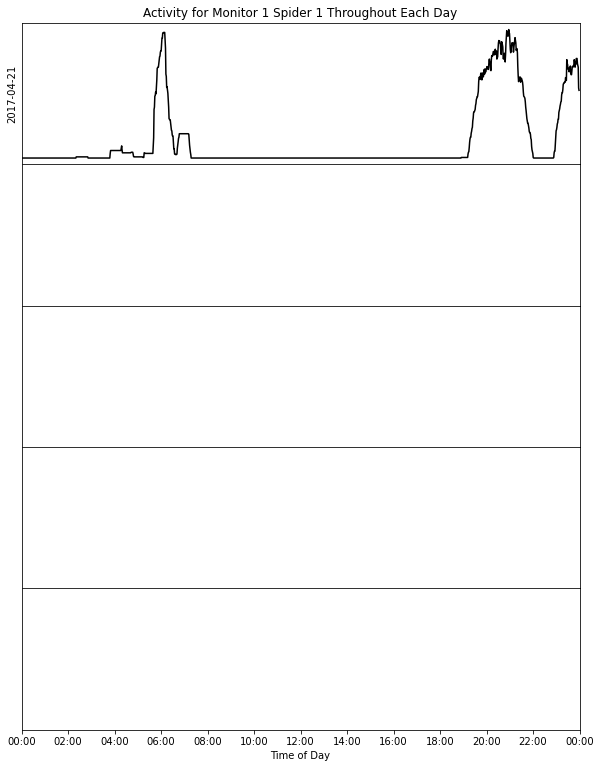

In [66]:
plot_data_on_raster_plot(rolling_df, activity_onset_df, column_name)

In [ ]:
type(activity_onset_df[column_name][1])
    
    
    